## Training of `Feed forward Neural network` using torch

## Importing all the necessary files

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


### Here we can created a datatset with the help of make_classification

In [ ]:
x, y = make_classification(n_samples = 200, n_features = 10, n_informative= 8, random_state= 123, n_classes= 2)


### Converting data set to a pandas data-set and reading the data set

In [ ]:
X = pd.DataFrame(x)
X

In [ ]:
y

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1])

### Splitting the data set in train test and spit

In [ ]:
Train_x, Test_x, Train_y, Test_y = train_test_split(X,y)

## Creating Dataset class to get the length and items if data set.


In [ ]:
class Dataset(torch.utils.data.Dataset):
  def __init__(self, Train, Target):
    self.Train = Train
    self.Target = Target
  def __len__(self):
    return self.Train.shape[0]
  def __getitem__(self,idx):
    Train = self.Train.iloc[idx].values
    Target = self.Target[idx]
    Train = torch.from_numpy(Train)
    Target = torch.tensor(Target)
    return Train, Target



In [ ]:
type(Train_x)


pandas.core.frame.DataFrame

In [ ]:
Dataset(Train_x,Train_y).__getitem__(1)

(tensor([ 3.6570, -0.4354, -1.8261,  0.0276,  2.1886, -2.8507,  2.2196,  0.3892,
          1.1725,  0.7541], dtype=torch.float64),
 tensor(0))

In [ ]:
Train_y

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1])

### Creating dataloader.

In [ ]:
train_dl = torch.utils.data.DataLoader(Dataset(Train_x, Train_y), batch_size = 120, shuffle = True, num_workers = 2, pin_memory = False)
test_dl = torch.utils.data.DataLoader(Dataset(Test_x, Test_y),  batch_size = 120, shuffle = True, num_workers = 2, pin_memory = False )
for data, target in train_dl:
  print(data[0])
  break

tensor([-2.2883, -1.4111,  1.1592,  1.2258,  1.8392,  1.6750,  0.0744,  1.3978,
        -0.5257, -3.7627], dtype=torch.float64)


In [ ]:
for data, target in train_dl:
  print(data[0].shape)

torch.Size([10])
torch.Size([10])


#### Defining the network layers, activation functions and forward function.

In [ ]:
class NN(nn.Module):
  def __init__(self):
    super(NN, self).__init__()
    self.layer1 = nn.Linear(10,20)
    self.layer2 = nn.Linear(20, 1)
    self.Relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()
  def forward(self, x):
    output1 = self.layer1(x)
    output2 = self.Relu(output1)
    output3 = self.layer2(output2)
    output4 = self.Relu(output3)
    output5 = self.sigmoid(output4)
    return output5


In [ ]:
model = NN()

In [ ]:
for data, target in train_dl:
  print(target.shape)


torch.Size([120])
torch.Size([30])


**Using `Cross entropy loss due to multiclass classification`**

In [ ]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

# Model `Training`

In [ ]:
num_epochs = 100
train_losses = []
test_losses = []
for epoch in range(num_epochs):
  train_epoch_loss = 0
  test_epoch_loss = 0
  for data, target in train_dl:
    data = data.to(torch.float32)
    target = target[...,None].to(torch.float32)
    output = model(data)
    loss = loss_fn(output, target)
    train_epoch_loss +=loss.detach().numpy()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  with torch.no_grad():
    for data, target in test_dl:
      output = model(data.to(torch.float32))
      loss = loss_fn(output, target[...,None].to(torch.float32))
      test_epoch_loss += loss.detach().numpy()
    train_losses.append(train_epoch_loss)
    test_losses.append(test_epoch_loss)


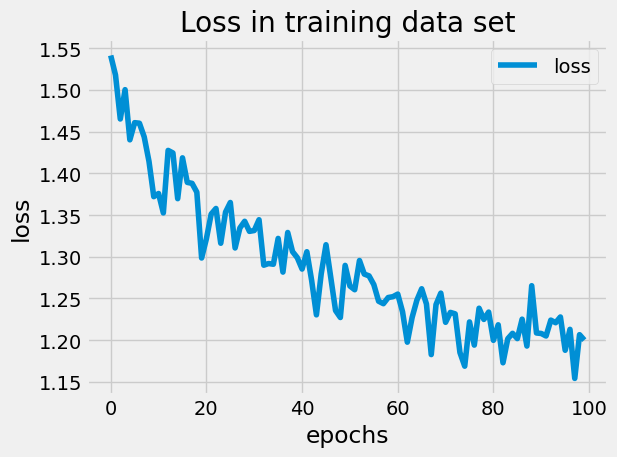

In [34]:
plt.plot(train_losses)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss in training data set")
plt.legend(["loss"])
plt.tight_layout()
plt.style.use("ggplot")
plt.show()

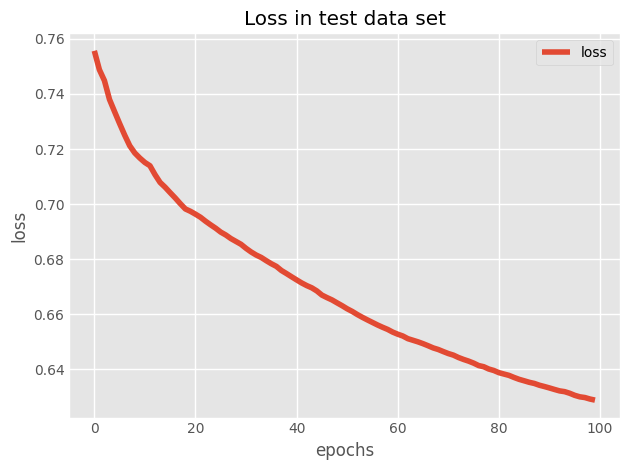

In [36]:
plt.plot(test_losses)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss in test data set")
plt.legend(["loss"])
plt.tight_layout()
plt.style.use("ggplot")
plt.show()